<a href="https://colab.research.google.com/github/Sayli-Athare/TCS-ion-Rio_210_Classification_of_Drug_Trail_Dataset/blob/main/TCS_ion_Rio_210_Classification_of_drug_trial_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TCS-ion-Rio_210_Classification_of_Drug_Trail_Dataset**

In [1]:
pip install faker

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


 **Importing standard libraries**

In [2]:
from faker import Faker
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = Faker()

**Creating name column with Faker**

In [4]:
def create_names(n):
   name = []
   for _ in range(0, n):
        name.append(df1.name())
   return name

In [5]:
name = create_names(362806)

In [6]:
df_name = pd.DataFrame(list(zip(name)),columns = ['Name'])

In [7]:
df_name.head()

,Name
0,Cody Smith
1,Tracy Adams
2,Eduardo Silva
3,Richard Duke
4,Pamela Barnes


In [8]:
df_name.shape

(362806, 1)

**Creating race column**

In [9]:
def weighted_cartesian_choice(*iterables):
    # An arbitrary number of tuple or lists,each consisting of population and weights.weighted_cartesian_choice returns a list 
    #with a chocie from each population
    
    res = []
    for population, weights in iterables:
     #normalize weight:
        weights = np.array(weights) / sum(weights)
        lst = np.random.choice(population, p=weights)
        res.append(lst)
    return res
race = (['White','Hispanic', 'Black','Asian'], 
        [.32,.28,.22,.18])

list=[]
for i in range(362806):
    res = weighted_cartesian_choice(race)
    list.append(res)

In [10]:
df_race=pd.DataFrame(list, columns = ['Race'])

In [11]:
df_race.head()

,Race
0,Black
1,Asian
2,Asian
3,White
4,White


**Concatenating name and race columns**

In [12]:
df_nr = pd.concat([df_name, df_race], axis=1).reindex(df_race.index)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df_drugs = pd.read_csv('/home/saf/Desktop/TCS Internship/Classification/drug_data.csv')

In [14]:
df_drugs.head(10)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
5,55-64,Other,7/19/2008,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,,0
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
7,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
8,25-34,Acne,4/27/2016,wymzya fe,163180,4,2,,2,Female,"Nausea , vomiting , headache , bloating , ...",1
9,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0


**Creating the final dataset**

In [15]:
data_drugs = pd.concat([df_nr, df_drugs], axis=1).reindex(df_drugs.index)
data_drugs.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Cody Smith,Black,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Tracy Adams,Asian,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Eduardo Silva,Asian,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Richard Duke,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Pamela Barnes,White,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


**Converting the dataframe to csv file**

In [16]:
data_drugs = data_drugs.to_csv('/home/saf/Desktop/TCS Internship/Classification/drug_newdata.csv', index=False)

**Loading the dataset**

In [18]:
data = pd.read_csv('/home/saf/Desktop/TCS Internship/Classification/drug_newdata.csv')
data

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Cody Smith,Black,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Tracy Adams,Asian,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Eduardo Silva,Asian,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Richard Duke,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Pamela Barnes,White,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362801,Michael Coleman,Hispanic,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,Jared Barber,White,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,Veronica Porter,Asian,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,Theresa Holder,Asian,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


**Description of the dataset**

Name : Name of the patient

Race : Race of the patient

Age : Age of the patient

Condition : Condition/symptom from which the patient is suffering

Date : Date of usage

Drug : Name of the drug

DrugId : Identity/code of drug

EaseofUse : Patient's 10-Star rating on the ease of use of drug

Effectiveness : Patient's 10-Star rating on the effectiveness of drug

Reviews : Patient's review

Satisfaction : Patient's 10-Star rating on satisfaction

Sex : Gender of the patient

Sides : Side effects of the drug

UsefulCount : Number of users who found the review useful

**DATA EXPLORATION**

**To display first five rows of the dataset**

In [19]:
data.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Cody Smith,Black,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Tracy Adams,Asian,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Eduardo Silva,Asian,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Richard Duke,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Pamela Barnes,White,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


**To display the last five rows of the dataset**

In [20]:
data.tail()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,Michael Coleman,Hispanic,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,Jared Barber,White,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,Veronica Porter,Asian,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,Theresa Holder,Asian,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,Judy Rogers,Hispanic,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


**To display more information**

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Race           362806 non-null  object
 2   Age            362806 non-null  object
 3   Condition      362806 non-null  object
 4   Date           362806 non-null  object
 5   Drug           362806 non-null  object
 6   DrugId         362806 non-null  int64 
 7   EaseofUse      362806 non-null  int64 
 8   Effectiveness  362806 non-null  int64 
 9   Reviews        362763 non-null  object
 10  Satisfaction   362806 non-null  int64 
 11  Sex            362806 non-null  object
 12  Sides          362806 non-null  object
 13  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


**Insight:**

The info() method will give summary of the dataset. We can know the basic information about the dataset including the type of columns, non-null values and memory usage. This dataset contains 9 categorical variables and 5 integer variables.

In [22]:
data.shape

(362806, 14)

**Insight:**

The dataset contains 362806 rows and 14 columns.

**Checking for any NULL values**

In [23]:
data.isnull().any()

Name             False
Race             False
Age              False
Condition        False
Date             False
Drug             False
DrugId           False
EaseofUse        False
Effectiveness    False
Reviews           True
Satisfaction     False
Sex              False
Sides            False
UsefulCount      False
dtype: bool

**Insight :**
'Reviews' has missing values.

In [24]:
data.isna().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          43
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

**Insight:**
'Reviews' column has 37 missing values.

**Datatypes of columns:**

In [25]:
data.dtypes

Name             object
Race             object
Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

**Insight:**
The dataset contains five integer datatype fields and nine object datatype fields.

**Descriptive statistics**

In [26]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


**Insight:**
Displays the summary statistics such as count, mean, standard deviation, minimum and maximum value, first, second and third quartile values.

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DrugId,362806.0,36879.370774,52624.412971,1.0,4896.0,9548.0,63522.0,178546.0
EaseofUse,362806.0,4.019829,1.317711,1.0,3.0,5.0,5.0,10.0
Effectiveness,362806.0,3.532061,1.455961,1.0,3.0,4.0,5.0,10.0
Satisfaction,362806.0,3.135408,1.611106,1.0,1.0,3.0,5.0,10.0
UsefulCount,362806.0,6.744916,9.324240,0.0,1.0,4.0,9.0,255.0


**Insight:**
EaseofUse, Effectiveness and Satisfaction ranges from 1 to 10. UsefulCount varies from 0 to 255.

**Summary statistics - object datatype**

In [30]:
data.describe(include='object').T

,count,unique,top,freq
Name,362806,180777,Michael Smith,192
Race,362806,4,White,115712
Age,362806,12,45-54,80043
Condition,362806,1806,Other,49765
Date,362806,4524,10/29/2007,404
Drug,362806,7093,cymbalta,4648
Reviews,362763,250166,,41824
Sex,362806,3,Female,238226
Sides,362806,1651,,17460


**Insight:**
Age group between 45 to 54 is the highest.

Female patients are more than male patients.

The use of cymbalta is highest when compared with other drugs.

**Checking for duplicate values:**

In [31]:
data.duplicated().sum()

0

**Insight:**
There are no duplicate values present in the dataset.



**Exploring the column names:**

In [32]:
data.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

**Insight:**
Displays names of columns in the dataset.

**Unique occurrences of each variable:**

In [36]:
for i in data.columns:
    print(i,'   :',data[i].nunique(),'\n')

Name    : 180777 

Race    : 4 

Age    : 12 

Condition    : 1806 

Date    : 4524 

Drug    : 7093 

DrugId    : 6572 

EaseofUse    : 7 

Effectiveness    : 7 

Reviews    : 250166 

Satisfaction    : 7 

Sex    : 3 

Sides    : 1651 

UsefulCount    : 148 



**Insight:**

'Sex' has three categories.

Four different races are present.

'Drug' has more values than 'DrugId'.

'Condition' has lesser values than 'Drug'/'DrugId'.

'Reviews' has close to 70% unique values.

**Creating the list of categorical variables:**

In [37]:
cat_var = []

for column in data:
    if data[column].dtype == 'O':
        cat_var.append(column)
cat_var

['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides']

In [40]:
# finding the unique values in each categorical variables
for col in cat_var:
    print('\n', col, '\n', data[col].unique(), '\n', '_' * 80)


 Name 
 ['Cody Smith' 'Tracy Adams' 'Eduardo Silva' ... 'Jared Barber'
 'Veronica Porter' 'Judy Rogers'] 
 ________________________________________________________________________________

 Race 
 ['Black' 'Asian' 'White' 'Hispanic'] 
 ________________________________________________________________________________

 Age 
 ['75 or over' '25-34' '65-74' '35-44' '55-64' '45-54' '19-24' ' ' '13-18'
 '7-12' '0-2' '3-6'] 
 ________________________________________________________________________________

 Condition 
 ['Stuffy Nose' 'Cold Symptoms' 'Other' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance'] 
 ________________________________________________________________________________

 Date 
 ['9/21/2014' '1/13/2011' '7/16/2012' ... '10/25/2019' '6/22/2019'
 '10/19/2019'] 
 ________________________________________________________________________________

 Drug 
 ['25dph-7.5peh' 'warfarin (bulk) 100 % powder' 'wymzya fe' ...
 'chest con

In [41]:
data['Name'].value_counts()

Name
Michael Smith        192
Michael Johnson      137
Michael Williams     122
John Smith           116
Jennifer Smith       115
                    ... 
Mackenzie Andrews      1
Paige Donovan          1
Deborah Ingram         1
Timothy Campos         1
Judy Rogers            1
Name: count, Length: 180777, dtype: int64

In [42]:
data['Race'].value_counts()

Race
White       115712
Hispanic    101579
Black        79724
Asian        65791
Name: count, dtype: int64

In [43]:
data['Age'].value_counts()

Age
45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: count, dtype: int64

In [44]:
data['Date'].value_counts()

Date
10/29/2007    404
10/30/2007    316
10/28/2007    315
3/15/2010     308
3/16/2010     295
             ... 
10/19/2019      2
10/27/2019      1
10/20/2019      1
6/28/2019       1
6/22/2019       1
Name: count, Length: 4524, dtype: int64

In [45]:
data['Drug'].value_counts()

Drug
cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: count, Length: 7093, dtype: int64

In [46]:
data['DrugId'].value_counts()

DrugId
6873      8538
1025      7868
6007      7728
4398      5864
14208     5451
          ... 
4118         1
165948       1
54215        1
154021       1
149247       1
Name: count, Length: 6572, dtype: int64

In [47]:
data['EaseofUse'].value_counts()

EaseofUse
5     192650
4      74732
3      41303
1      35927
2      18191
6          2
10         1
Name: count, dtype: int64

In [48]:
data['Effectiveness'].value_counts()

Effectiveness
5     130388
4      81821
3      60406
1      59387
2      30801
6          2
10         1
Name: count, dtype: int64

In [49]:
data['Reviews'].value_counts()

Reviews
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           41824
good                                                                                                                                                                                                                                                                                                                                           

In [50]:
data['Satisfaction'].value_counts()

Satisfaction
5     111550
1     100901
4      63158
3      51852
2      35342
6          2
10         1
Name: count, dtype: int64

In [51]:
data['Sex'].value_counts()

Sex
Female    238226
Male       98043
           26537
Name: count, dtype: int64

In [52]:
data['Sides'].value_counts()

Sides
                                                                                                                                                       17460
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                          15563
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.       12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                 9162
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.              7790
                                                                                                                                                       ...  
Nausea ,  vomiting ,  stomach / abdominal pain , gas

In [53]:
data['UsefulCount'].value_counts()

UsefulCount
0      71608
1      46240
2      34701
3      27307
4      22862
       ...  
136        1
178        1
176        1
169        1
95         1
Name: count, Length: 148, dtype: int64

In [54]:
data['Condition'].value_counts()

Condition
Other                                                  49765
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect of Benzodiazepine-Based Tranquilizer        1
Name: count, Length: 1806, dtype: int64

In [55]:

data['Drug'].value_counts().head(20)

Drug
cymbalta                                               4648
lisinopril                                             4269
lisinopril solution                                    4269
lexapro                                                4134
hydrocodone-acetaminophen                              3944
effexor xr                                             3486
lyrica                                                 3069
tramadol hcl er                                        2932
tramadol hcl                                           2932
zoloft                                                 2662
prednisone tablet, delayed release (enteric coated)    2576
prednisone concentrate                                 2576
prednisone                                             2576
seroquel                                               2446
phentermine hcl                                        2367
celexa                                                 2224
topamax                            

**Selection of drug: A particular drug named Topamax with DrugId 14494 is selected in building a classification model to determine side effects**

In [57]:
drug_topamax= data.loc[(data['Drug'] =='topamax')]
drug_topamax.head(5)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
191568,Whitney Harvey,Black,45-54,Migraine Prevention,9/22/2019,topamax,14494,4,4,"I was on this drug for 5 years, 100mg for the ...",1,,"Tiredness, drowsiness, dizziness , loss of co...",5
191575,Justin Robinson,White,35-44,Simple Partial Seizures,9/2/2019,topamax,14494,4,4,I have partial seizures. It didn't help for a ...,4,,"Tiredness, drowsiness, dizziness , loss of co...",0
191582,Michael Miller,Hispanic,13-18,Migraine Prevention,8/9/2019,topamax,14494,1,1,I have been having migraines and headaches eve...,1,,"Tiredness, drowsiness, dizziness , loss of co...",6
191589,Jacqueline Boyer,White,65-74,Essential Tremor,7/21/2019,topamax,14494,4,4,This is the only medication I have taken for t...,3,,"Tiredness, drowsiness, dizziness , loss of co...",0
191596,John Duncan,Asian,45-54,Migraine Prevention,4/30/2019,topamax,14494,5,5,I suffered from debilitating Cluster Headaches...,5,,"Tiredness, drowsiness, dizziness , loss of co...",2


In [58]:
drug_topamax.shape

(2148, 14)

In [59]:
drug_topamax['Condition'].value_counts()

Condition
Migraine Prevention                                1380
Other                                               460
Simple Partial Seizures                              68
Convulsive Seizures                                  63
Tonic-Clonic Epilepsy                                48
Additional Medication to Treat Partial Seizures      48
Habit of Drinking Too Much Alcohol                   27
Essential Tremor                                     24
Additional Medication for Tonic-Clonic Epilepsy      15
Involuntary Quivering                                10
Epilepsy of the Lennox Gastaut Syndrome               4
Binge Eating Disorder                                 1
Name: count, dtype: int64

In [60]:
drug_topamax['Condition'].value_counts().sum()

2148

In [61]:
data_new = drug_topamax.copy()
data_copy = data.copy()

**DATA PRE-PROCESSING**



**1. HANDLING WHITESPACES**

In [62]:
# Handling instances with whitespaces
for i in data_new:
    data_new[i]=np.where(data_new[i]==" ",np.NAN,data_new[i])

In [63]:
data_new.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
191568,Whitney Harvey,Black,45-54,Migraine Prevention,9/22/2019,topamax,14494.0,4.0,4.0,"I was on this drug for 5 years, 100mg for the ...",1.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",5.0
191575,Justin Robinson,White,35-44,Simple Partial Seizures,9/2/2019,topamax,14494.0,4.0,4.0,I have partial seizures. It didn't help for a ...,4.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",0.0
191582,Michael Miller,Hispanic,13-18,Migraine Prevention,8/9/2019,topamax,14494.0,1.0,1.0,I have been having migraines and headaches eve...,1.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",6.0
191589,Jacqueline Boyer,White,65-74,Essential Tremor,7/21/2019,topamax,14494.0,4.0,4.0,This is the only medication I have taken for t...,3.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",0.0
191596,John Duncan,Asian,45-54,Migraine Prevention,4/30/2019,topamax,14494.0,5.0,5.0,I suffered from debilitating Cluster Headaches...,5.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",2.0



**2. MISSING VALUES**

In [64]:
#checking missing values
data_new.isnull().sum()

Name               0
Race               0
Age               75
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews          200
Satisfaction       0
Sex              103
Sides              0
UsefulCount        0
dtype: int64

**Bar plot showing the null value count of each feature**

Text(0.5, 1.0, 'Total Missing Values')

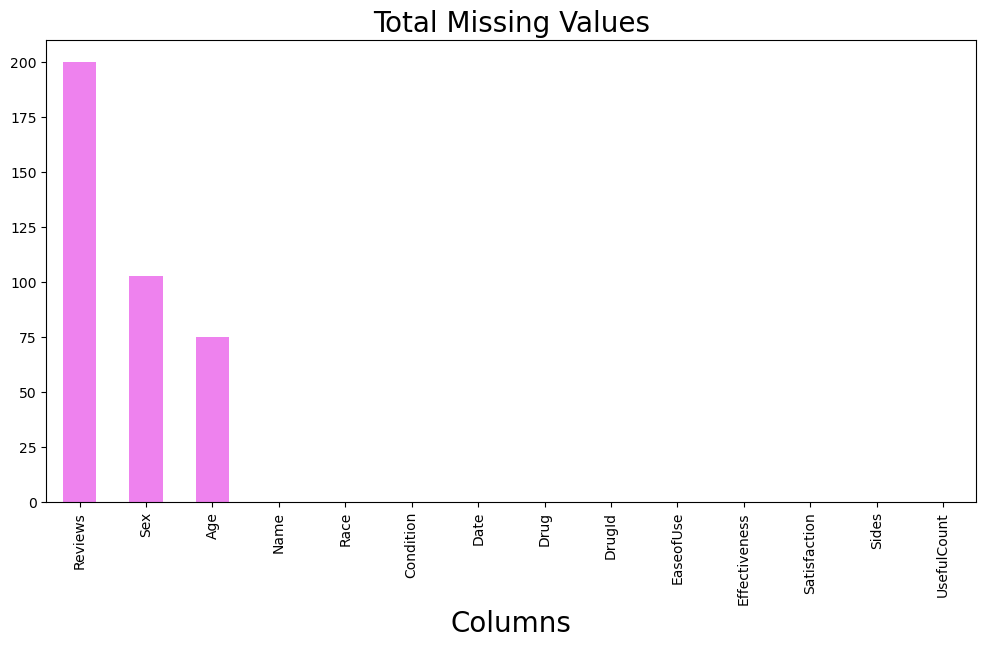

In [65]:
missing = (data_new.isnull().sum()).sort_values(ascending=False)
missing.plot(kind="bar", figsize = (12,6), fontsize = 10, color='violet')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [66]:
# Removing rows with null data
data_new=data_new.dropna(axis=0)

data_new.isnull().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [67]:
data_new.shape

(1830, 14)

**3.GENDER**

In [68]:
data_new['Sex'].value_counts()

Sex
Female    1669
Male       161
Name: count, dtype: int64

**4.HANDLING AGE GROUP**

In [69]:
data_new['Age'].value_counts()


Age
45-54         463
35-44         455
25-34         423
55-64         196
19-24         184
13-18          51
65-74          37
7-12            8
75 or over      8
3-6             3
0-2             2
Name: count, dtype: int64

In [70]:
data_new['Age'].unique()


array(['7-12', '25-34', '45-54', '65-74', '55-64', '35-44', '19-24',
       '13-18', '75 or over', '3-6', '0-2'], dtype=object)

In [71]:
data_new['Age']=data_new['Age'].str.replace('75 or over','75-100')


In [72]:
data_new['Age'].value_counts()


Age
45-54     463
35-44     455
25-34     423
55-64     196
19-24     184
13-18      51
65-74      37
7-12        8
75-100      8
3-6         3
0-2         2
Name: count, dtype: int64

**5.OUTLIER DETECTION**

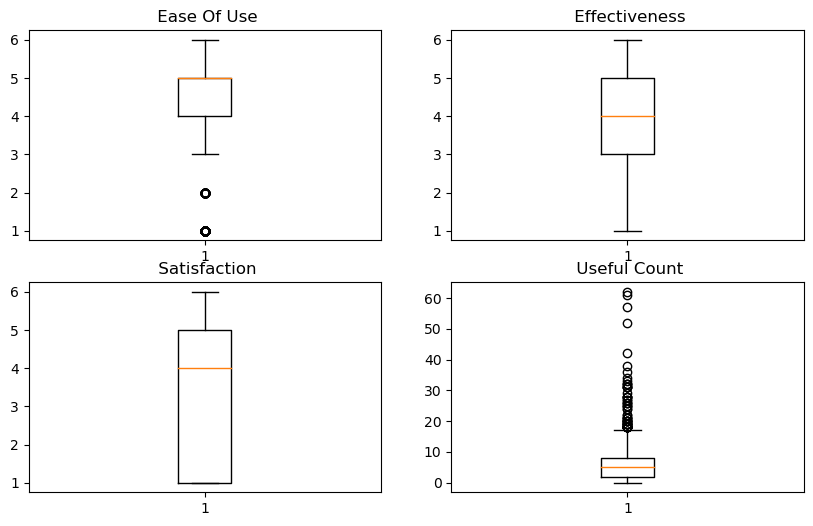

In [73]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_new["EaseofUse"])
plt.title(" Ease Of Use")

plt.subplot(2,2,2)
plt.boxplot(data_new["Effectiveness"])
plt.title(" Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data_new["Satisfaction"])
plt.title(" Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data_new["UsefulCount"])
plt.title(" Useful Count")
plt.show()

**Insight:**
Outliers are present in EaseofUse and UsefulCount columns.



**Removing outliers**

In [74]:
# define a function called 'outliers' which returns a list of outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

In [75]:
#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['UsefulCount', 'EaseofUse']:
    index_list.extend(outliers(data_new,feature))
index_list

[191785,
 191911,
 191925,
 191939,
 192009,
 192016,
 192023,
 192030,
 192058,
 192275,
 192317,
 192492,
 192888,
 193037,
 193082,
 193286,
 193316,
 193319,
 193337,
 193340,
 193472,
 193502,
 193505,
 193508,
 193520,
 193535,
 193571,
 194130,
 194146,
 194264,
 194282,
 194300,
 194336,
 194344,
 194390,
 194496,
 194740,
 194818,
 194890,
 194914,
 194946,
 195358,
 195382,
 195420,
 195448,
 195494,
 195526,
 195940,
 195988,
 196040,
 196076,
 196134,
 196162,
 196340,
 196400,
 196410,
 196510,
 196756,
 196774,
 197000,
 197184,
 197188,
 197198,
 191624,
 191631,
 191757,
 191862,
 191911,
 191939,
 192128,
 192135,
 192142,
 192163,
 192219,
 192226,
 192289,
 192303,
 192317,
 192324,
 192457,
 192485,
 192499,
 192527,
 192548,
 192674,
 192737,
 192779,
 192800,
 192929,
 192959,
 192965,
 193022,
 193025,
 193031,
 193055,
 193085,
 193118,
 193124,
 193151,
 193178,
 193274,
 193331,
 193352,
 193394,
 193436,
 193445,
 193514,
 193517,
 193586,
 193607,
 193616,
 

In [76]:
#define a function called 'remove' which returns a cleaned data without outliers
def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df

In [77]:
data_new.shape

(1830, 14)

In [78]:
data_new=remove(data_new,index_list)

In [79]:
data_new.shape

(1548, 14)

**UsefulCount and EasofUse columns post outliers removal**

Text(0.5, 1.0, 'Box plot of Useful Count')

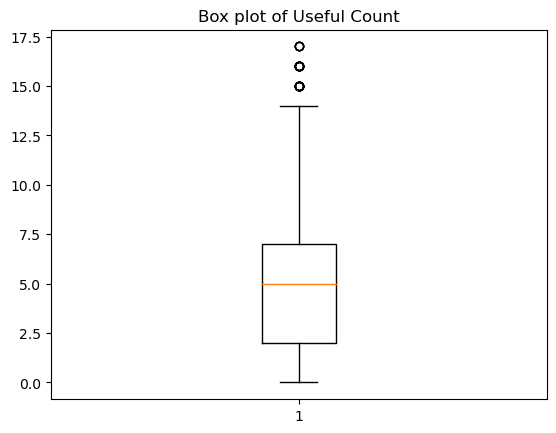

In [80]:
plt.boxplot(data_new["UsefulCount"])
plt.title('Box plot of Useful Count')

Text(0.5, 1.0, 'Box plot of Ease Of Use')

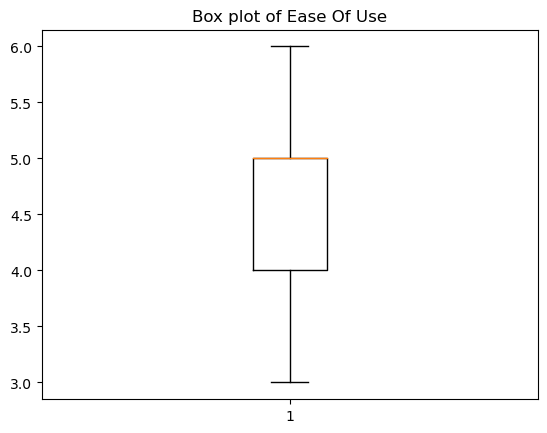

In [81]:
plt.boxplot(data_new["EaseofUse"])
plt.title('Box plot of Ease Of Use')

**Satisfaction column**

In [82]:
data_new['Satisfaction'].value_counts()


Satisfaction
5.0    545
4.0    334
1.0    309
3.0    229
2.0    130
6.0      1
Name: count, dtype: int64

In [83]:
data_new[data_new['Satisfaction'] > 5]


,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
195282,Anne Fisher,Black,35-44,Migraine Prevention,5/18/2009,topamax,14494.0,6.0,6.0,ahoj som zo slovenska dlhe roky mam migreny tu...,6.0,Female,"Tiredness, drowsiness, dizziness , loss of co...",0.0


**Deleting values greater than 5 from Satisfaction column**

In [84]:
data_new.drop(labels = data_new[data_new['Satisfaction'] == 6].index, axis = 0, inplace = True)
data_new[data_new['Satisfaction'] == 6]


,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount


**6. FEATURE ENGINEERING**

**Creation of a new SideEffects column**

In [91]:
data1=np.where(data_new['Satisfaction'] == 1.0, "Nil", data_new['Satisfaction'])
data1=np.where(data_new['Satisfaction'] == 2.0, "Mild",data1)
data1=np.where(data_new['Satisfaction'] == 3.0, "Moderate", data1)
data1=np.where(data_new['Satisfaction'] == 4.0, "Severe", data1)
data1=np.where(data_new['Satisfaction'] == 5.0, "Extreme",data1)

In [92]:
data_new['SideEffects']=data1


**Since DrugId is the same, dropping the column**

In [93]:
data_new.drop(['Satisfaction','DrugId'], inplace=True, axis=1)
data_new.head()

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,Sex,Sides,UsefulCount,SideEffects
191610,Christopher Barron,White,7-12,Simple Partial Seizures,2/26/2019,topamax,4.0,5.0,"I'm now 30 years old, but I was 12 when I was ...",Male,"Tiredness, drowsiness, dizziness , loss of co...",0.0,Extreme
191638,Erica Harrington,Hispanic,65-74,Migraine Prevention,6/22/2014,topamax,5.0,5.0,I have been taking Topamax for exactly four ye...,Female,"Tiredness, drowsiness, dizziness , loss of co...",9.0,Extreme
191645,Mark Hale,Hispanic,55-64,Other,12/27/2018,topamax,5.0,5.0,I suffer with spinal degeneration that I am su...,Female,"Tiredness, drowsiness, dizziness , loss of co...",0.0,Extreme
191652,Antonio Morgan,Black,45-54,Migraine Prevention,12/17/2018,topamax,5.0,3.0,I have been taking 50 mg 2x a day since 11/30/...,Female,"Tiredness, drowsiness, dizziness , loss of co...",7.0,Mild
191659,Dale Perez,Asian,25-34,Tonic-Clonic Epilepsy,10/18/2018,topamax,5.0,5.0,The important thin I want to say is Topamax is...,Male,"Tiredness, drowsiness, dizziness , loss of co...",1.0,Extreme


In [94]:
#data_new.to_csv('drug_topamax_eda.csv', index=False)
data_copy = data_new.copy()

**7. FEATURE REDUCTION**

**Correlation analysis**


**Correlation matrix is plotted to check the relationship between variables**

In [96]:
corrmatrix = data_new.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

ValueError: could not convert string to float: 'Christopher Barron'

**Here, being common, dropped the Drug, Sides columns. The other columns such as Date, Name, Reviews and UsefulCount are also dropped since these doesn't deal with side effects of the drug.**

In [97]:
data_new=data_new.drop(columns = ['Name','Drug','Date','Sides','Reviews','UsefulCount'],axis=1)
data_new=data_new.reset_index(drop=True)
data_new.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,White,7-12,Simple Partial Seizures,4.0,5.0,Male,Extreme
1,Hispanic,65-74,Migraine Prevention,5.0,5.0,Female,Extreme
2,Hispanic,55-64,Other,5.0,5.0,Female,Extreme
3,Black,45-54,Migraine Prevention,5.0,3.0,Female,Mild
4,Asian,25-34,Tonic-Clonic Epilepsy,5.0,5.0,Male,Extreme


In [98]:
data_new.shape

(1547, 7)

**8.ENCODING**

In [99]:
#Finding categorical columns and changing datatype
for cl in data_new.select_dtypes(include = ['object']):
    data_new[cl]=data_new[cl].astype('category')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Race           1547 non-null   category
 1   Age            1547 non-null   category
 2   Condition      1547 non-null   category
 3   EaseofUse      1547 non-null   float64 
 4   Effectiveness  1547 non-null   float64 
 5   Sex            1547 non-null   category
 6   SideEffects    1547 non-null   category
dtypes: category(5), float64(2)
memory usage: 33.1 KB


In [101]:
data_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Race           1547 non-null   category
 1   Age            1547 non-null   category
 2   Condition      1547 non-null   category
 3   EaseofUse      1547 non-null   float64 
 4   Effectiveness  1547 non-null   float64 
 5   Sex            1547 non-null   category
 6   SideEffects    1547 non-null   category
dtypes: category(5), float64(2)
memory usage: 33.1 KB


In [102]:
data_new.columns


Index(['Race', 'Age', 'Condition', 'EaseofUse', 'Effectiveness', 'Sex',
       'SideEffects'],
      dtype='object')

In [103]:
data_new.head()


,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,White,7-12,Simple Partial Seizures,4.0,5.0,Male,Extreme
1,Hispanic,65-74,Migraine Prevention,5.0,5.0,Female,Extreme
2,Hispanic,55-64,Other,5.0,5.0,Female,Extreme
3,Black,45-54,Migraine Prevention,5.0,3.0,Female,Mild
4,Asian,25-34,Tonic-Clonic Epilepsy,5.0,5.0,Male,Extreme


In [104]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
#for col in ['SideEffects', 'Drug','Age','Sex']:
for col in ['Race','Age','Sex','Condition','SideEffects']:   
    data_new[col]=label.fit_transform((data_new[col]).astype(str))
    
data_label=data_new

In [105]:
data_new.head()


,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,3,9,10,4.0,5.0,1,0
1,2,8,8,5.0,5.0,0,0
2,2,7,9,5.0,5.0,0,0
3,1,6,8,5.0,3.0,0,1
4,0,3,11,5.0,5.0,1,0


In [106]:
data_new.shape


(1547, 7)

**9.SCALING**

In [108]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scale=['Effectiveness','EaseofUse']
data_new[scale] = ss.fit_transform(data_new[scale])

In [109]:
data_new.shape


(1547, 7)

In [110]:
#data_new.to_csv('drug_topamax_modelling.csv', index=False)
data_model = data_new.copy()

# **EXPLORATORY DATA ANALYSIS**

**1. Top 20 Drugs**

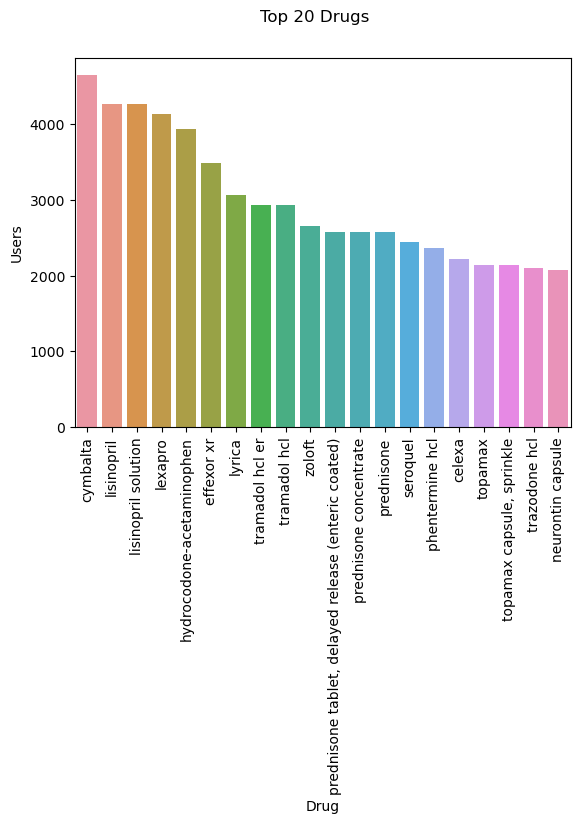

In [111]:
data1= data['Drug'].value_counts().head(20).reset_index()
data1.columns = ['Drug', 'Users']
sns.barplot(data=data1, x = 'Drug', y = 'Users')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

**Of over 7000 drugs, twenty features here each with minimum users above 2250. Of all, Cymbalta leads the pack with the maximum number of users.**

**2. Top 20 Conditions**

Text(0, 0.5, 'Users')

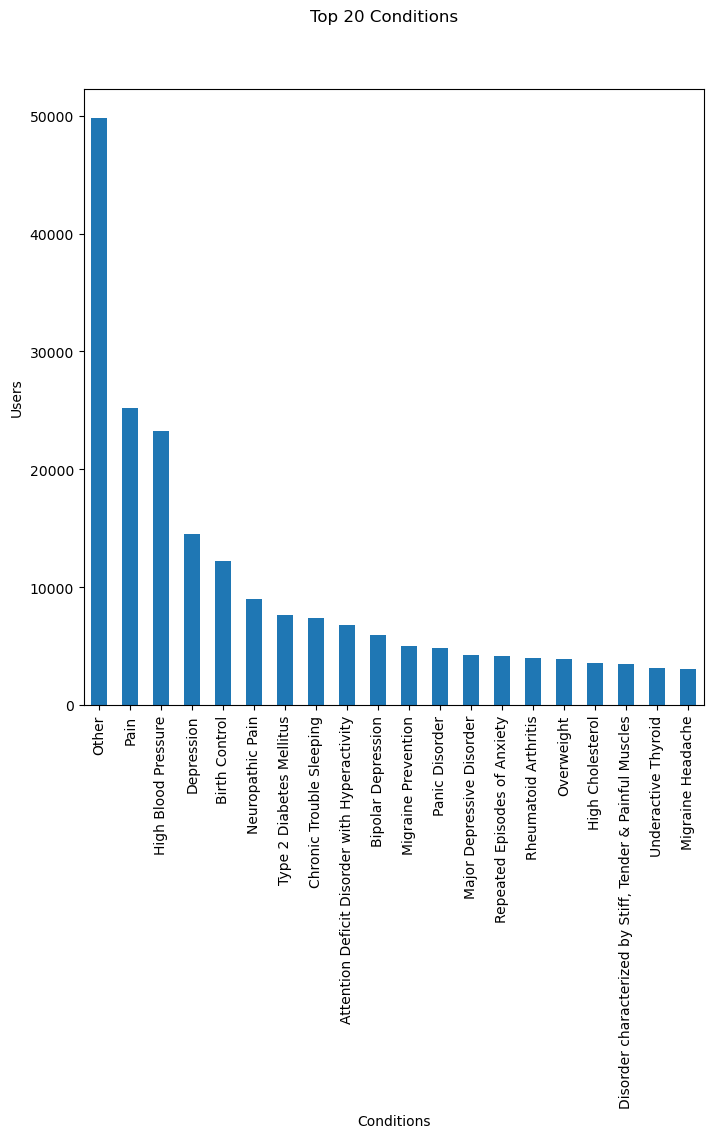

In [112]:
data['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 20 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

**Of 1806 Conditions, Other Conditions tops the chart followed respectively by Pain and High Blood Pressure.
The above being interpretation of the generic data, in line with the objective of project, will move ahead selecting a particular drug Topamax, one featuring in the top 20.**

**3. Conditions - Topamax**

Text(0, 0.5, 'Count')

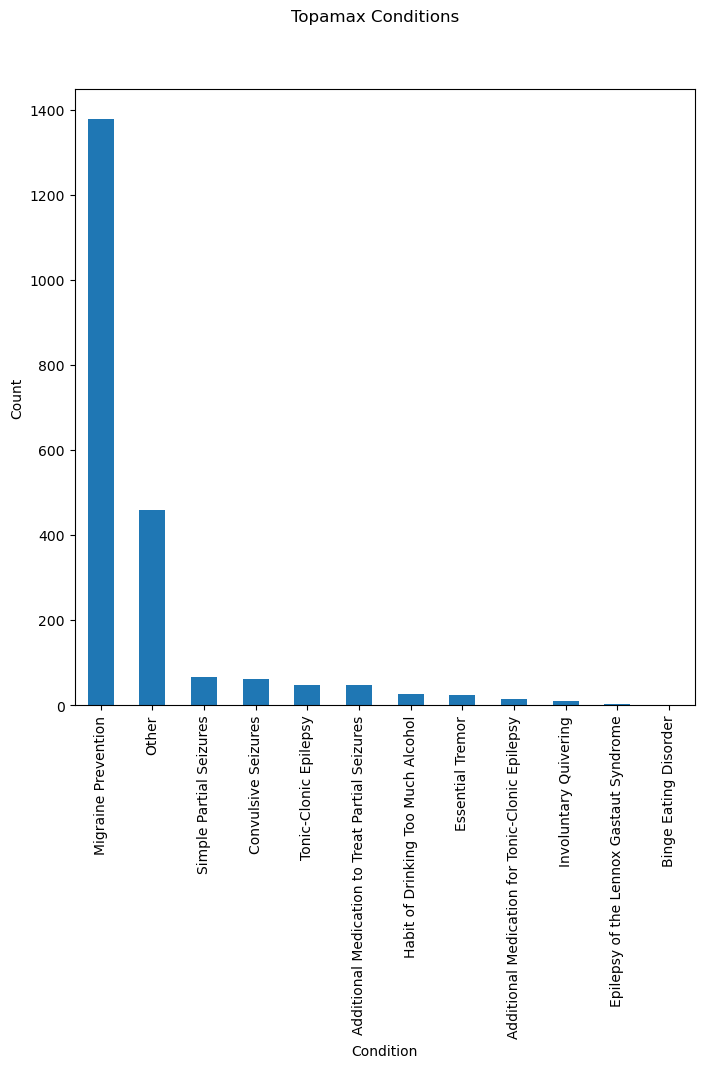

In [113]:
drug_topamax['Condition'].value_counts().nlargest(12).plot(kind='bar',figsize=(8,8))
plt.suptitle("Topamax Conditions")
plt.xlabel('Condition')
plt.ylabel('Count')

**Topamax is used in the treatment of 12 conditions. Maximum users consume the drug for migraine prevention.**

**4. Users by Gender - Topamax**

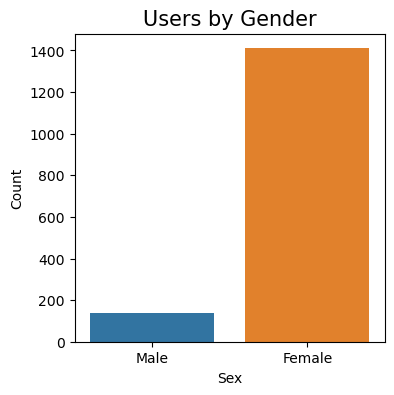

In [114]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=data_copy)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show()

**Female count stands more than male count.**

**5. Users by Race - Topamax**

Text(0, 0.5, 'Count')

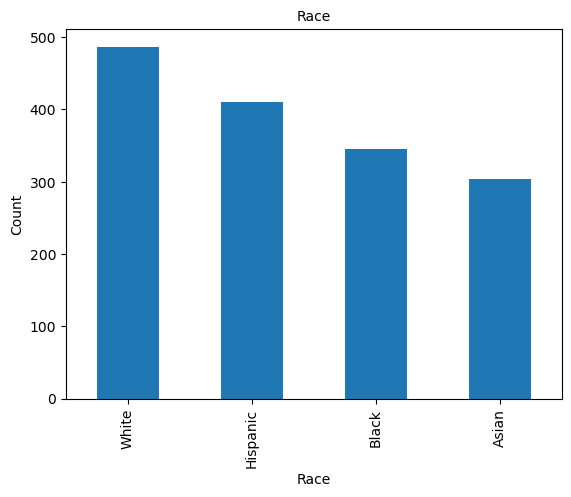

In [115]:
data_copy['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

**By race, Whites topped in the usage of drugs.**

**6. Users by Race and Gender**

Text(0.5, 1.0, 'Users by Race and Gender')

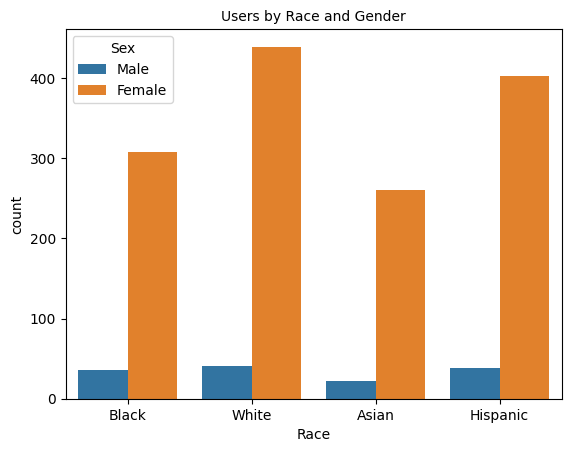

In [ ]:
sns.countplot(x='Race',hue='Sex',data=data_copy)
plt.title("Users by Race and Gender", fontsize = 10)

**Female users dominated across race, each substantially.**

**7. Users by Age and Gender**

Text(0.5, 1.0, 'Users by Age and Gender')

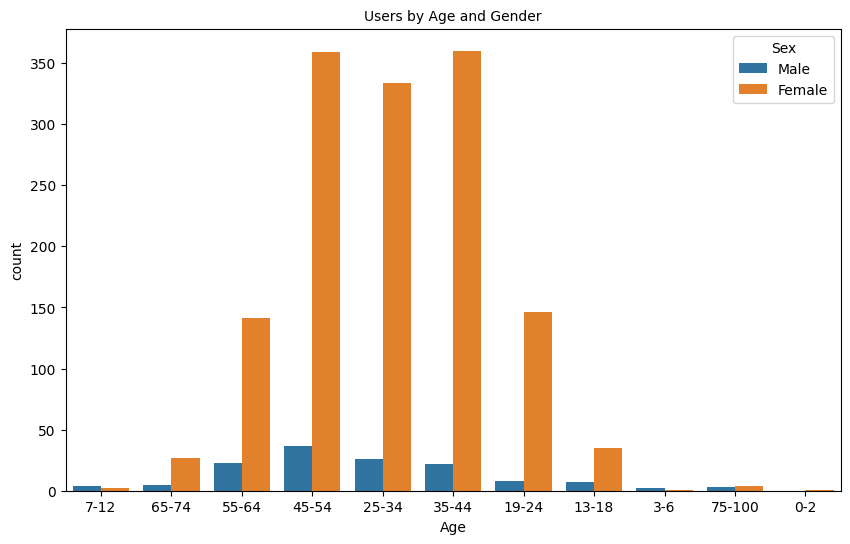

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data_copy)
plt.title("Users by Age and Gender", fontsize = 10)

**Domination of female users consistent across age groups above 12 and below 75 years. Plus, people in the age groups 35 to 44, 45 to 54 and 25 to 34 accounted for maximum usage of Topamax.**

**8. Correlation Heatmap**

In [ ]:
# heatmap of the data for checking the correlation
corrmatrix = data_copy.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

**Correlation is used to find relationship between variables. Here, variables are weakly or moderately correlated to each other.**

**9. Yearly Reviews - Topamax**

In [117]:
data_copy['Date'] = pd.to_datetime(data_copy['Date'], errors = 'coerce')

In [118]:
#extracting year from Date
data_copy['Year'] = data_copy['Date'].dt.year

In [124]:
data_copy

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,Sex,Sides,UsefulCount,SideEffects,Year,Day,Month
191610,Christopher Barron,White,7-12,Simple Partial Seizures,2019-02-26,topamax,4.0,5.0,"I'm now 30 years old, but I was 12 when I was ...",Male,"Tiredness, drowsiness, dizziness , loss of co...",0.0,Extreme,2019,26,2
191638,Erica Harrington,Hispanic,65-74,Migraine Prevention,2014-06-22,topamax,5.0,5.0,I have been taking Topamax for exactly four ye...,Female,"Tiredness, drowsiness, dizziness , loss of co...",9.0,Extreme,2014,22,6
191645,Mark Hale,Hispanic,55-64,Other,2018-12-27,topamax,5.0,5.0,I suffer with spinal degeneration that I am su...,Female,"Tiredness, drowsiness, dizziness , loss of co...",0.0,Extreme,2018,27,12
191652,Antonio Morgan,Black,45-54,Migraine Prevention,2018-12-17,topamax,5.0,3.0,I have been taking 50 mg 2x a day since 11/30/...,Female,"Tiredness, drowsiness, dizziness , loss of co...",7.0,Mild,2018,17,12
191659,Dale Perez,Asian,25-34,Tonic-Clonic Epilepsy,2018-10-18,topamax,5.0,5.0,The important thin I want to say is Topamax is...,Male,"Tiredness, drowsiness, dizziness , loss of co...",1.0,Extreme,2018,18,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197200,Joshua Sanders,Black,35-44,Other,2008-06-18,topamax,5.0,3.0,The first 3 weeks I felt great---it took a lot...,Female,"Tiredness, drowsiness, dizziness , loss of co...",9.0,Mild,2008,18,6
197201,Timothy Nash,Black,25-34,Migraine Prevention,2008-06-17,topamax,4.0,5.0,I have tried just about everything out there t...,Female,"Tiredness, drowsiness, dizziness , loss of co...",6.0,Extreme,2008,17,6
197202,Megan Jackson,Asian,35-44,Other,2008-06-14,topamax,5.0,1.0,I have a rash all around my neck after I start...,Female,"Tiredness, drowsiness, dizziness , loss of co...",4.0,Moderate,2008,14,6
197203,Ryan Wilkinson,White,35-44,Simple Partial Seizures,2008-06-14,topamax,3.0,1.0,I have read some of the reviews and am happy t...,Female,"Tiredness, drowsiness, dizziness , loss of co...",12.0,Nil,2008,14,6


<AxesSubplot:ylabel='count'>

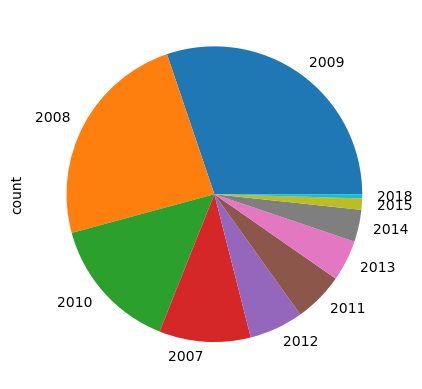

In [129]:
data_copy['Year'].value_counts().head(10).plot(kind='pie')

In [138]:
# data_copy = data_copy.drop(columns = ['Month','Day'])
data_copy.head()

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,Sex,Sides,UsefulCount,SideEffects,Year
191610,Christopher Barron,White,7-12,Simple Partial Seizures,2019-02-26,topamax,4.0,5.0,"I'm now 30 years old, but I was 12 when I was ...",Male,"Tiredness, drowsiness, dizziness , loss of co...",0.0,Extreme,2019
191638,Erica Harrington,Hispanic,65-74,Migraine Prevention,2014-06-22,topamax,5.0,5.0,I have been taking Topamax for exactly four ye...,Female,"Tiredness, drowsiness, dizziness , loss of co...",9.0,Extreme,2014
191645,Mark Hale,Hispanic,55-64,Other,2018-12-27,topamax,5.0,5.0,I suffer with spinal degeneration that I am su...,Female,"Tiredness, drowsiness, dizziness , loss of co...",0.0,Extreme,2018
191652,Antonio Morgan,Black,45-54,Migraine Prevention,2018-12-17,topamax,5.0,3.0,I have been taking 50 mg 2x a day since 11/30/...,Female,"Tiredness, drowsiness, dizziness , loss of co...",7.0,Mild,2018
191659,Dale Perez,Asian,25-34,Tonic-Clonic Epilepsy,2018-10-18,topamax,5.0,5.0,The important thin I want to say is Topamax is...,Male,"Tiredness, drowsiness, dizziness , loss of co...",1.0,Extreme,2018


**9. Effectiveness**

Text(0, 0.5, 'Count')

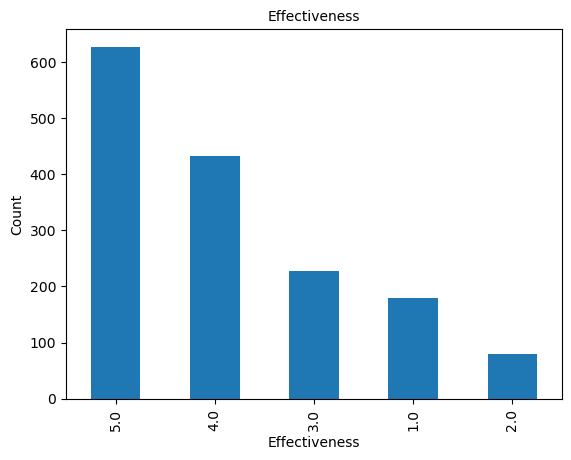

In [135]:
data_copy['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

**Most users found Topamax as highly effective.**

**10. Ease of Use**

Text(0, 0.5, 'Count')

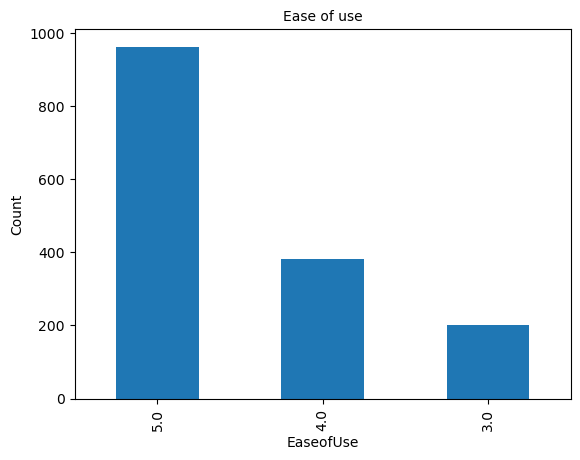

In [136]:
data_copy['EaseofUse'].value_counts().plot(kind='bar')
plt.title("Ease of use", fontsize = 10)
plt.xlabel("EaseofUse", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

**Most users rated Topamax highly for its ease of use.**

**11. Useful Count**

Text(0, 0.5, 'Count')

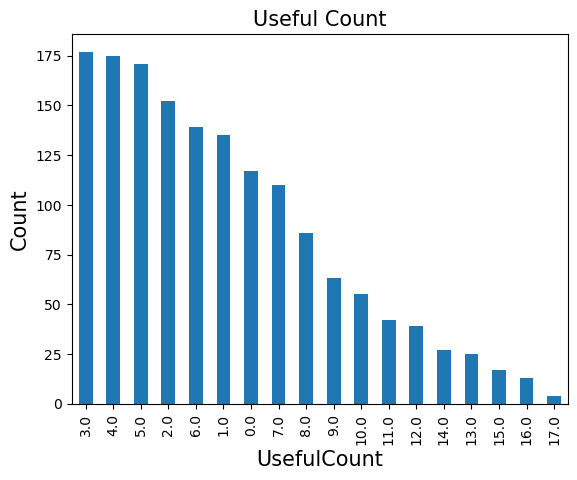

In [137]:
data_copy['UsefulCount'].value_counts().plot(kind='bar')
plt.title("Useful Count", fontsize = 15)
plt.xlabel("UsefulCount", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

**As with usefulness of reviews, Topamax users throw a mixed bag with most not finding the reviews beneficial.**

**12. Users by Effectiveness and Gender**

<Figure size 1000x800 with 0 Axes>

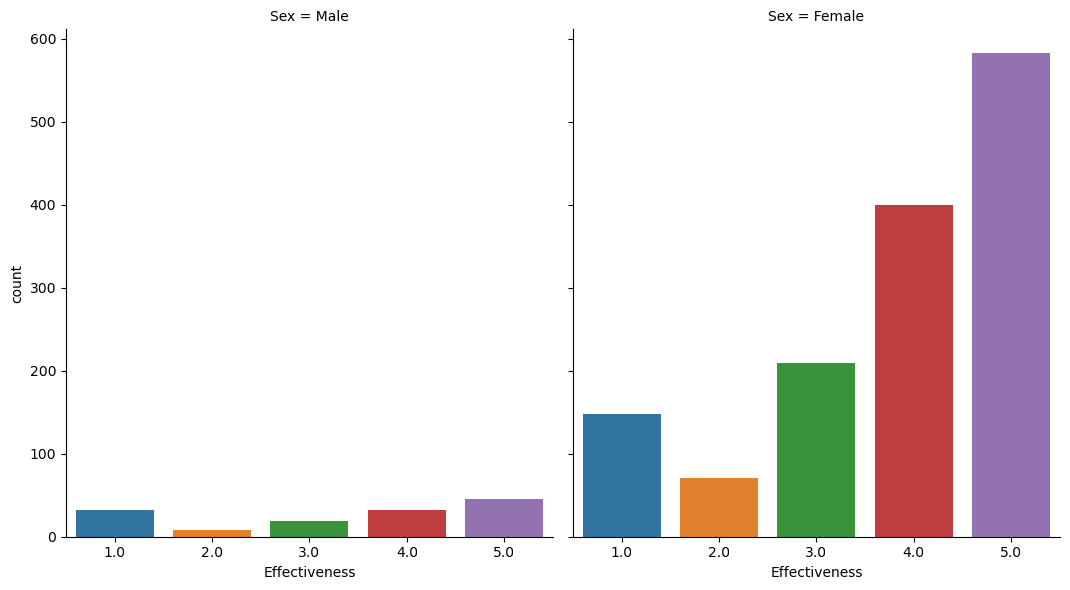

In [139]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=data_copy, kind="count",
                height=6,aspect =.9);

**Topamax is found to be highly effective in females.**

**13. Side Effects**

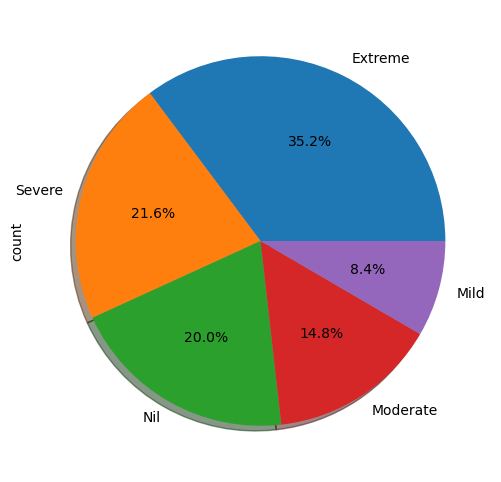

In [140]:
plt.figure(figsize=(6,6))
data_copy['SideEffects'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

**Extremely and Severe Side Effects accounted for the most closely followed by No Side Effects. Mild symptoms accounted for the least.**

**14. Side Effects and Age**

<AxesSubplot:xlabel='Age', ylabel='count'>

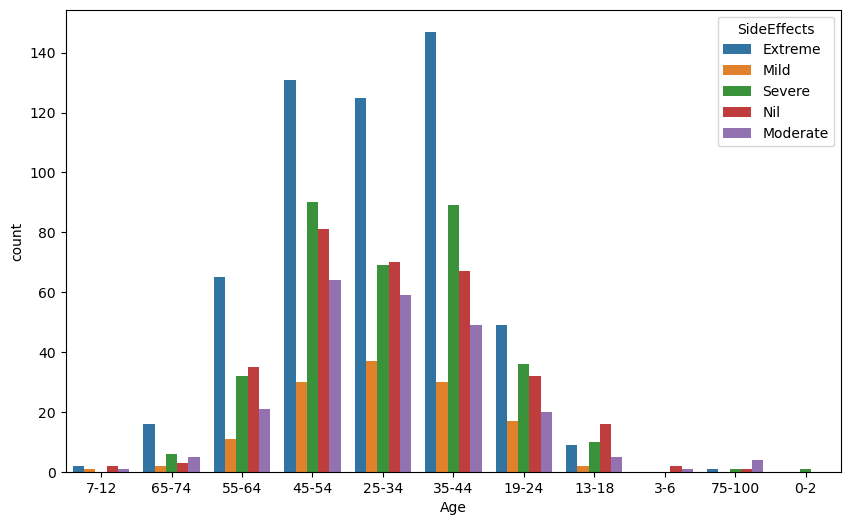

In [141]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='SideEffects',data=data_copy)

**No side effects topped in the age groups under 24. Extremely severe side effects topped in the age groups 35-44, 25-34, 45-54, 65-74 and 55-64.**

**15. Side Effects and Gender**

<Figure size 2000x1000 with 0 Axes>

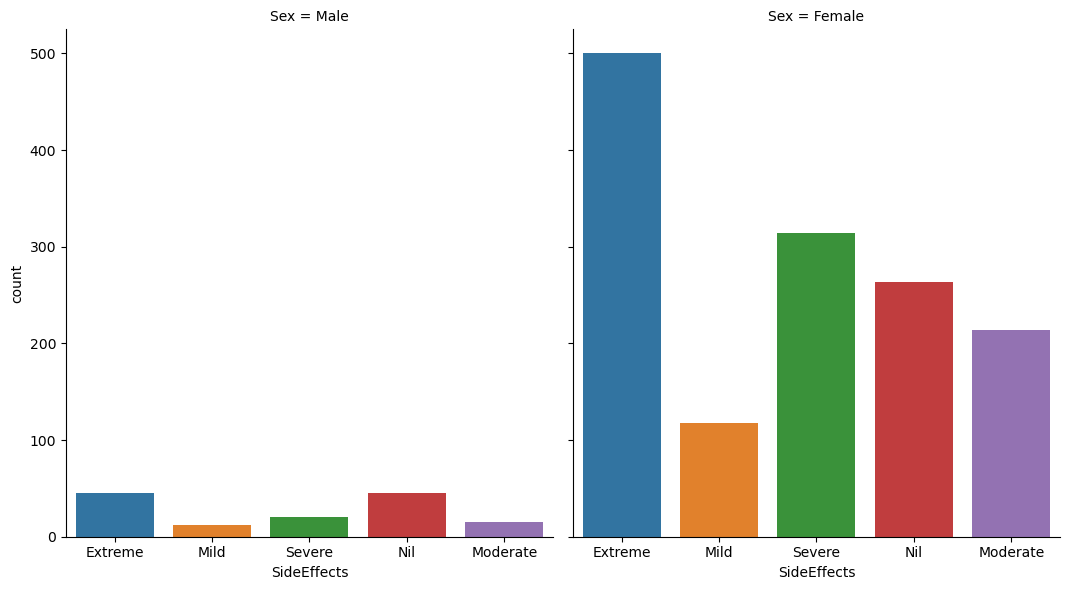

In [142]:
plt.figure(figsize=(20,10))

g = sns.catplot(x="SideEffects",col="Sex",data=data_copy, kind="count",height=6,aspect =.9);

**Side effects proved extreme in females. No side effects topped amoung men.**

**16. Side Effects and Race**

<AxesSubplot:xlabel='Race', ylabel='count'>

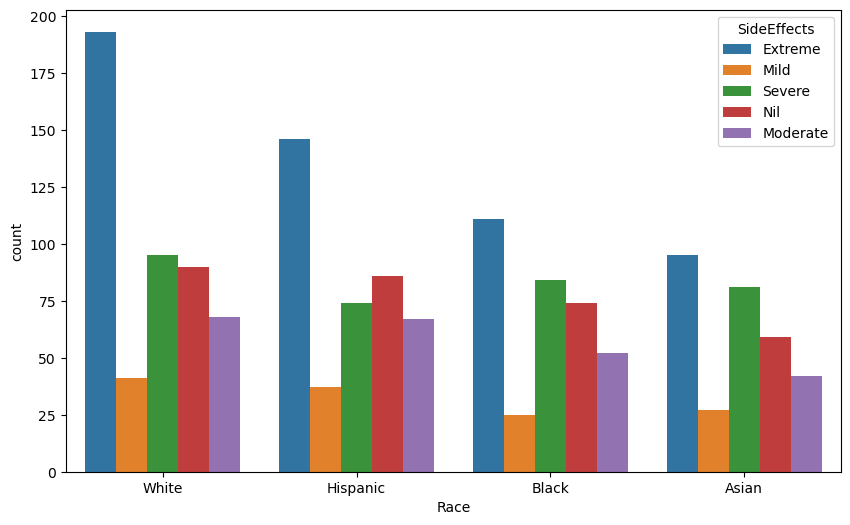

In [143]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='SideEffects',data=data_copy)

**Side effects proved race neutral with proportionate results.**


**SPLITTING THE DATA**

In [144]:
#target
y = data_new['SideEffects']

In [145]:
X = data_new.drop(['SideEffects'],axis=1)


In [146]:
X.shape


(1547, 6)

**SPLITTING THE DATASET INTO TRAIN AND TEST SETS**

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)#assigninng values

In [148]:
X_train.shape


(1237, 6)

In [149]:
X_test.shape


(310, 6)

In [150]:
y_train.shape


(1237,)

In [151]:
y_test.shape


(310,)

# **MODELLING**

**1. LOGISTIC REGRESSION MODEL**